In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

Text(0.5, 1.0, 'Mona Lisa')

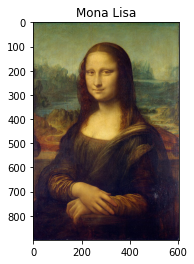

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/data_set/MonaLisa.jpeg')
plt.imshow(img)
plt.title("Mona Lisa")

In [ ]:
img.shape[1]
print(np.shape(img))

(900, 604, 3)


(b) Preprocessing the input

In [ ]:
height, width = img.shape[0], img.shape[1] #img.shape[0]=900, img.shape[1]=604
img_rgb = img.reshape(-1, 3) # shape:(543600, 3), 543600 = 900*604
# the folowing serves as index
y_5000 = np.random.choice(height, size=5000, replace=True)
x_5000 = np.random.choice(width, size=5000, replace=True)

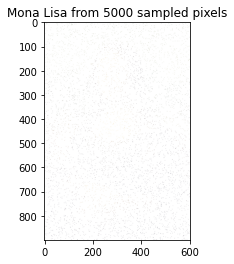

In [ ]:
img_5000px = np.zeros([height, width, 3]) +255
pixels = []
for x, y in zip(x_5000, y_5000):
    pixels.append(img[y,x])
    img_5000px[y,x] = img[y,x] #(x,y) coordinate
img_5000px = img_5000px.astype(int)
# Plotting the result
# Division by 255 because of rescaling the pixel intensities to lie between 0.0 and 1.0
plt.imshow(img_5000px);
plt.title("Mona Lisa from 5000 sampled pixels");

In [ ]:
print(np.shape(img_5000px))
print(np.shape(img_5000px[289]))
print(np.shape(pixels))

(900, 604, 3)
(604, 3)
(5000, 3)


In [ ]:
#5000 set of coordiniates (x,y)
coords = np.array([y_5000, x_5000]).T

In [ ]:
coords[0]

array([822, 583])

In [ ]:
def rand_forest_regr(n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    rf = RandomForestRegressor(n_estimators=n_estimators, 
                               max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf=min_samples_leaf)
    rf.fit(coords, pixels)
    
    prediction = np.zeros([height, width, 3])
    for i in range(height):
        for j in range(width):
            prediction[i,j] = rf.predict(np.array([i,j]).reshape(1,-1))
    return prediction / 255

Citation: https://github.com/AGENT-O07/MonaLisa/blob/master/MonaLisa.ipynb

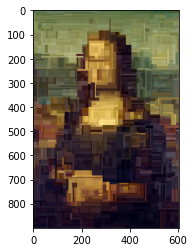

In [ ]:
img_rf = rand_forest_regr(1) #(900, 604, 3)
plt.imshow(img_rf)
plt.show() #10 trees

In [ ]:
def display_results(pars):
    i = 1
    for n_estimators in pars['n_estimators']: #number of trees
        for max_depth in pars['max_depth']: #depth
            img_rf = rand_forest_regr(n_estimators, max_depth)
            plt.imshow(img_rf)
            title = "N_Trees=" + str(n_estimators) + " Depth=" + str(max_depth)
            plt.title(title);
            plt.show()
            i += 1

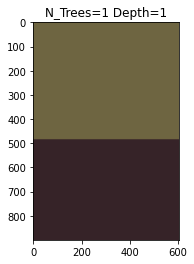

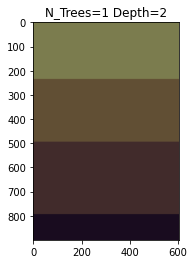

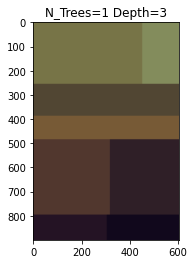

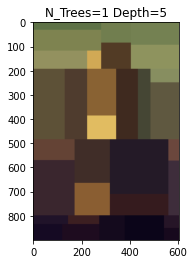

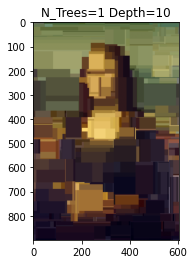

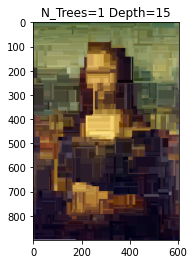

In [ ]:
# containing a single decision tree, but with depths 1, 2, 3, 5, 10, and 15.
params = {'n_estimators' : [1], 
          'max_depth' : [1, 2, 3, 5, 10, 15]} #dic
display_results(params)

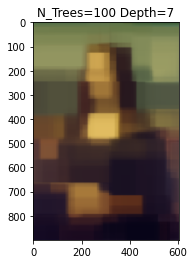

In [ ]:
#a random forest of depth 7, but with number of trees equal to 1, 3, 5, 10, and 100.
#params = {'n_estimators' : [1, 3, 5, 10, 100],
 #         'max_depth' : [7]}
params = {'n_estimators' : [100], 'max_depth' : [7]}
display_results(params)

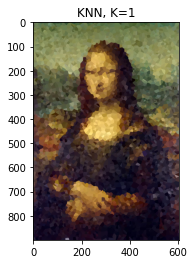

In [ ]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(coords, pixels)

prediction = np.zeros([height, width, 3])
for i in range(height):
    for j in range(width):
        prediction[i,j] = knn.predict(np.array([i,j]).reshape(1,-1))

plt.imshow(prediction / 255)
plt.title('KNN, K=1')
plt.show()

Experiment with different pruning strategies of your choice.

In [ ]:
def disp_pruning_results(pars):
    i = 1
    for min_samples_split in pars['min_samples_split']:
        for min_samples_leaf in pars['min_samples_leaf']:
            img_rf = rand_forest_regr(max_depth=10, 
                                      min_samples_split=min_samples_split, 
                                      min_samples_leaf=min_samples_leaf)
            plt.imshow(img_rf)
            title = "min_samples_split=" + str(min_samples_split) + " min_samples_leaf=" + str(min_samples_leaf)
            plt.title(title);
            plt.show()
            i += 1

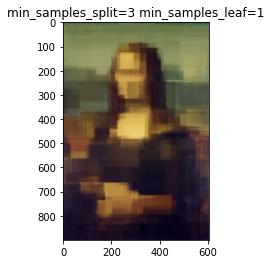

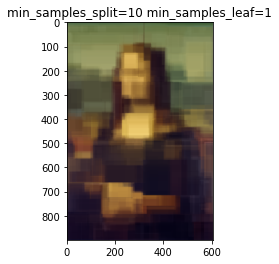

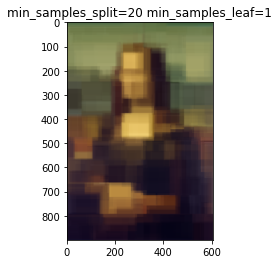

In [ ]:
params = {'min_samples_split' : [3, 10, 20],
          'min_samples_leaf' : [1]}
disp_pruning_results(params)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text 

In [ ]:
rf2 = DecisionTreeClassifier(max_depth=1,random_state=0)
rf2.fit(coords, pixels)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(837.0, 1268.3999999999999, 'X[0] <= 479.5\ngini = 0.992\nsamples = 5000\nvalue = [[6, 8, 10, 14, 17, 24, 27, 21, 17, 21, 23, 28\n 28, 25, 26, 26, 26, 47, 20, 30, 29, 34, 33, 46\n 38, 43, 55, 34, 40, 35, 32, 45, 36, 44, 45, 41\n 40, 39, 30, 32, 37, 31, 35, 39, 41, 39, 44, 25\n 45, 36, 25, 36, 37, 49, 20, 28, 38, 26, 41, 29\n 23, 31, 31, 18, 32, 29, 35, 28, 30, 34, 26, 30\n 28, 35, 22, 36, 36, 31, 38, 25, 46, 28, 33, 30\n 34, 32, 25, 34, 27, 34, 23, 19, 25, 31, 33, 33\n 35, 26, 22, 26, 24, 21, 33, 27, 23, 24, 32, 34\n 21, 30, 30, 38, 33, 20, 23, 29, 19, 25, 23, 23\n 28, 32, 23, 23, 32, 14, 25, 35, 25, 32, 32, 22\n 40, 21, 23, 23, 21, 22, 24, 19, 18, 20, 18, 19\n 18, 20, 17, 19, 17, 19, 18, 19, 11, 12, 12, 15\n 18, 17, 17, 18, 13, 8, 10, 16, 13, 14, 8, 8\n 7, 13, 6, 5, 8, 6, 8, 9, 5, 9, 7, 10, 8\n 11, 6, 11, 4, 5, 6, 6, 9, 1, 7, 5, 4, 6, 4\n 4, 8, 5, 3, 1, 7, 8, 7, 3, 4, 3, 3, 7, 2\n 9, 2, 3, 3, 4, 7, 5, 2, 2, 6, 9, 6, 4, 5\n 4, 5, 6, 6, 2, 7, 1, 5, 3, 1, 4, 2, 5, 1\n 4, 4, 2, 4, 2,

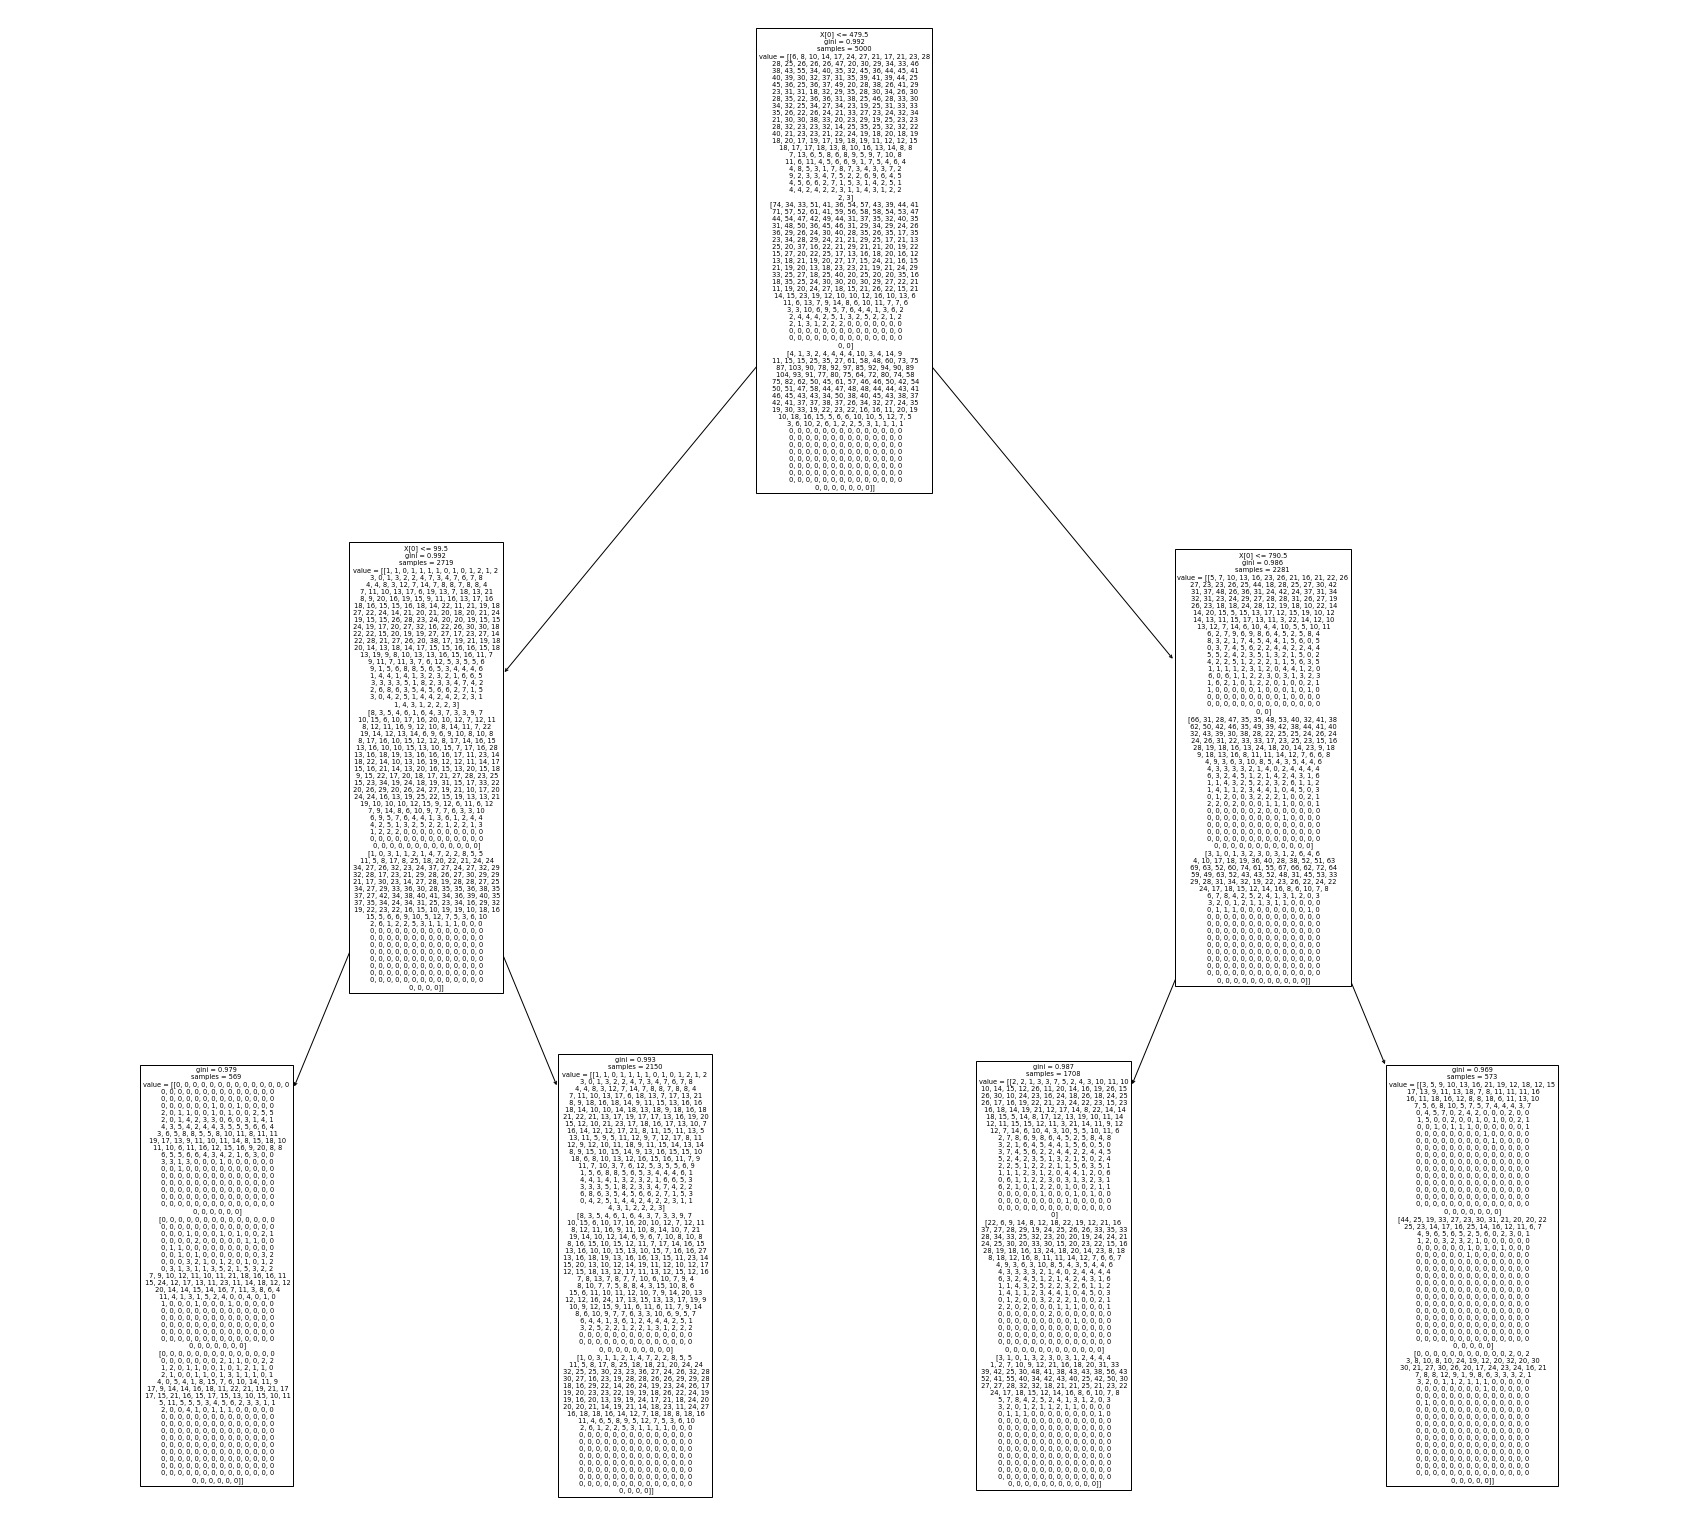

In [ ]:
#plot_tree(rf2, feature_name=features, class_name=classes, filled=True)
plt.figure(figsize=(30,28))
plot_tree(rf2)

In [ ]:
pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz 

In [ ]:
viz = dtreeviz(rf2,
               x_data=coords,
               y_data=pixels)
viz

IndexError: ignored